In [66]:
import pandas as pd
import numpy as np

def dimensionality(A):
    return A.shape[1]

def vector_space(A):
    return A.shape[0]

def rank(A):
    return np.linalg.matrix_rank(A)

file_path = 'Lab Session Data.xlsx'
data = pd.read_excel(file_path, sheet_name='Purchase data')

A = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()
C = data['Payment (Rs)'].to_numpy()

dimensionality_of_space = dimensionality(A)
print(f"Dimensionality of the vector space: {dimensionality_of_space}")

num_vectors = vector_space(A)
print(f"Number of vectors in this vector space: {num_vectors}")

rank_A = rank(A)
print(f"Rank of Matrix A: {rank_A}")


Dimensionality of the vector space: 3
Number of vectors in this vector space: 10
Rank of Matrix A: 3


In [68]:
'''A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
available with the vendor.'''

def model_vector(A, C):
    A_pseudo_inv = np.linalg.pinv(A)
    X = A_pseudo_inv @ C
    return X

file_path = 'Lab Session Data.xlsx'
data = pd.read_excel(file_path, sheet_name='Purchase data')

A = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()
C = data['Payment (Rs)'].to_numpy()

X = model_vector(A, C)
print(f"Model vector (coefficients) for predicting the cost: {X}")


Model vector (coefficients) for predicting the cost: [ 1. 55. 18.]


In [32]:
'''A3. Mark all customers (in "Purchase Data" table) with payments above Rs. 200 as RICH and others
as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on
purchase behavior.'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
file_path = 'Lab Session Data.xlsx'
data = pd.read_excel(file_path, sheet_name='Purchase data')

# Add a new column to mark customers as RICH or POOR
data['Class'] = np.where(data['Payment (Rs)'] > 200, 'RICH', 'POOR')

# Prepare the features (X) and the target (y)
X = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict the classes on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.5
Confusion Matrix:
[[1 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

        POOR       0.50      1.00      0.67         1
        RICH       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\HOME\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HOME\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HOME\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Mean of Price: 1560.6634538152612
Variance of Price: 58732.36535253922
Sample Mean for Wednesdays: 1550.7060000000001
Comparison with Population Mean: 1550.7060000000001 vs 1560.6634538152612
Sample Mean for April: 1698.9526315789474
Comparison with Population Mean: 1698.9526315789474 vs 1560.6634538152612
Probability of making a loss: 0.4979919678714859
Probability of making a profit on Wednesday: 0.42
Conditional probability of making a profit given that today is Wednesday: 0.42


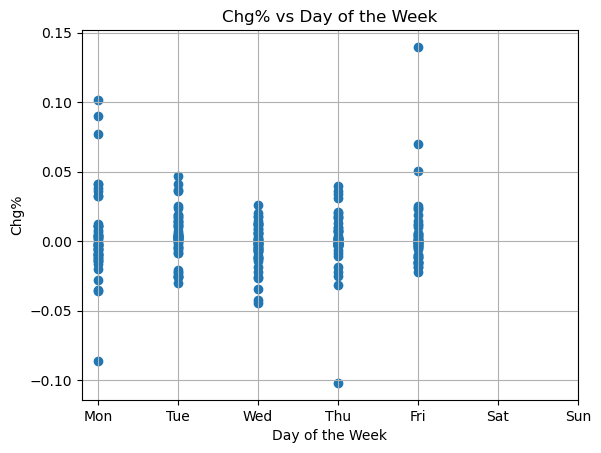

In [34]:
'''A4. Please refer to the data present in "IRCTC Stock Price" data sheet of the above excel file. Do the
following after loading the data to your programming platform.
Calculate the mean and variance of the Price data present in column D.
(Suggestion: if you use Python, you may use sta mean ( ) &
. ( ) methods).
Select the price data for all Wednesdays and calculate the sample mean. Compare the mean
with the population mean and note your observations.
Select the price data for the month of Apr and calculate the sample mean. Compare the
mean with the population mean and note your observations.
From the Chg% (available in column l) find the probability of making a loss over the stock.
(Suggestion: use lambda function to find negative values)
Calculate the probability of making a profit on Wednesday.
Calculate the conditional probability of making profit, given that today is Wednesday.
Make a scatter plot Of Chg% data against the day Of the week'''


import matplotlib.pyplot as plt

# Load the data
file_path = 'Lab Session Data.xlsx'
data = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

# Calculate the mean and variance of the Price data in column D
price_data = data['Price']
mean_price = price_data.mean()
variance_price = price_data.var()

print(f"Mean of Price: {mean_price}")
print(f"Variance of Price: {variance_price}")

# Select the price data for all Wednesdays and calculate the sample mean
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.day_name()
wednesday_data = data[data['DayOfWeek'] == 'Wednesday']
wednesday_mean = wednesday_data['Price'].mean()

print(f"Sample Mean for Wednesdays: {wednesday_mean}")
print(f"Comparison with Population Mean: {wednesday_mean} vs {mean_price}")

# Select the price data for the month of April and calculate the sample mean
april_data = data[data['Date'].dt.month == 4]
april_mean = april_data['Price'].mean()

print(f"Sample Mean for April: {april_mean}")
print(f"Comparison with Population Mean: {april_mean} vs {mean_price}")

# Find the probability of making a loss over the stock (negative Chg%)
chg_data = data['Chg%']
loss_prob = (chg_data < 0).mean()

print(f"Probability of making a loss: {loss_prob}")

# Calculate the probability of making a profit on Wednesday
profit_wednesday_prob = (wednesday_data['Chg%'] > 0).mean()

print(f"Probability of making a profit on Wednesday: {profit_wednesday_prob}")

# Calculate the conditional probability of making a profit, given that today is Wednesday
total_wednesdays = len(wednesday_data)
profitable_wednesdays = len(wednesday_data[wednesday_data['Chg%'] > 0])
conditional_prob_profit_given_wednesday = profitable_wednesdays / total_wednesdays

print(f"Conditional probability of making a profit given that today is Wednesday: {conditional_prob_profit_given_wednesday}")

# Make a scatter plot of Chg% data against the day of the week
data['DayOfWeekNum'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6

plt.scatter(data['DayOfWeekNum'], data['Chg%'])
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Chg% vs Day of the Week')
plt.grid(True)
plt.show()


   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1            t  128   

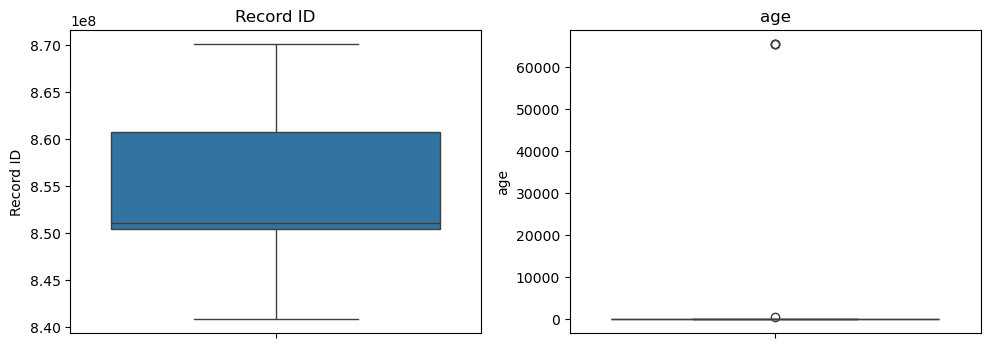

Mean and Standard Deviation for numeric variables:
         Record ID          age
mean  8.529473e+08    73.555822
std   7.581969e+06  1183.976718


In [42]:
'''A5. Data Exploration: Load the data available in "thyroid0387_UCl" worksheet. Perform the
following tasks:
Study each attribute and associated values present. Identify the datatype (nominal etc.)
for the attribute,
For categorical attributes, identify the encoding scheme to be employed. (Guidance:
employ label encoding for ordinal variables while One-Hot encoding may be employed
for nominal variables).
Study the data range for numeric variables.
Study the presence of missing values in each attribute.
Study presence of outliers in data.
For numeric variables, calculate the mean and variance (or standard deviation).'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the data
file_path = 'Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the data to understand its structure
print(data.head())

# Identify the datatype of each attribute
print(data.info())

# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values in each attribute:\n{missing_values}")

# Handling categorical attributes
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols}")

# Apply Label Encoding for ordinal variables and One-Hot Encoding for nominal variables
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse_output=False)

encoded_data = data.copy()
for col in categorical_cols:
    if col in ['ordered_ordinal_attribute']:  # Replace with actual ordinal attributes if any
        encoded_data[col] = label_encoder.fit_transform(data[col])
    else:
        # One-Hot Encode nominal variables
        encoded_data = pd.get_dummies(encoded_data, columns=[col])

# Study the data range for numeric variables
numeric_cols = data.select_dtypes(include=[np.number]).columns
print(f"Data range for numeric variables:")
for col in numeric_cols:
    print(f"{col}: Min = {data[col].min()}, Max = {data[col].max()}")

# Study presence of outliers in numeric data using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Calculate mean and variance (or standard deviation) for numeric variables
numeric_stats = data[numeric_cols].agg(['mean', 'std'])
print(f"Mean and Standard Deviation for numeric variables:\n{numeric_stats}")

# Optional: If you need to handle missing values, you can do it here
# data = data.fillna(method='ffill')  # Example of filling missing values with forward fill



   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1            t  128   

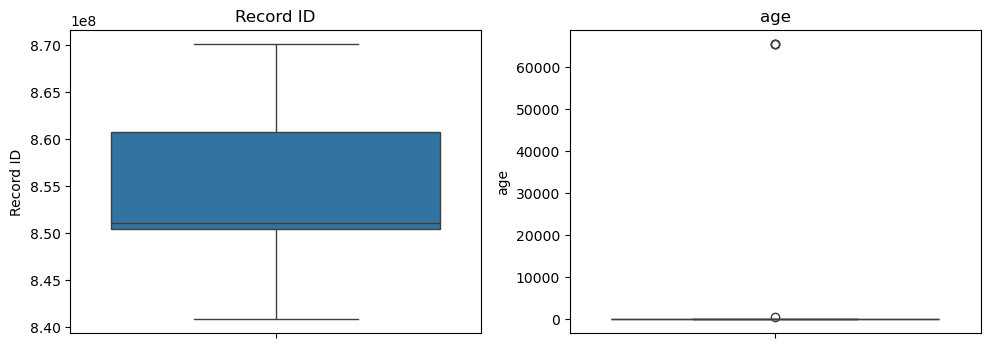

Mean and Standard Deviation for numeric variables:
         Record ID          age
mean  8.529473e+08    73.555822
std   7.581969e+06  1183.976718
Missing values after imputation:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI           

In [50]:
'''A6. Data Imputation: employ appropriate central tendencies to fill the missing values in the data
variables. Employ following guidance.
Mean may be used when the attribute is numeric with no outliers
Median may be employed for attributes which are numeric and contain outliers
Mode may be employed for categorical attributes'''


from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the data
file_path = 'Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'  
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the data to understand its structure
print(data.head())

# Identify the datatype of each attribute
print(data.info())

# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values in each attribute:\n{missing_values}")

# Handling categorical attributes
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols}")

# Apply Label Encoding for ordinal variables and One-Hot Encoding for nominal variables
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse_output=False)

encoded_data = data.copy()
for col in categorical_cols:
    if col in ['ordered_ordinal_attribute']:  # Replace with actual ordinal attributes if any
        encoded_data[col] = label_encoder.fit_transform(data[col])
    else:
        # One-Hot Encode nominal variables
        encoded_data = pd.get_dummies(encoded_data, columns=[col])

# Study the data range for numeric variables
numeric_cols = data.select_dtypes(include=[np.number]).columns
print(f"Data range for numeric variables:")
for col in numeric_cols:
    print(f"{col}: Min = {data[col].min()}, Max = {data[col].max()}")

# Study presence of outliers in numeric data using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Calculate mean and variance (or standard deviation) for numeric variables
numeric_stats = data[numeric_cols].agg(['mean', 'std'])
print(f"Mean and Standard Deviation for numeric variables:\n{numeric_stats}")

# Data Imputation
# Mean for numeric attributes with no outliers
no_outliers_cols = []  # Add column names of numeric attributes with no outliers
for col in no_outliers_cols:
    data[col] = data[col].fillna(data[col].mean())

# Median for numeric attributes with outliers
with_outliers_cols = []  # Add column names of numeric attributes with outliers
for col in with_outliers_cols:
    data[col] = data[col].fillna(data[col].median())

# Mode for categorical attributes
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Verify if all missing values have been filled
missing_values_after_imputation = data.isnull().sum()
print(f"Missing values after imputation:\n{missing_values_after_imputation}")


In [54]:
'''A7. Data Normalization / Scaling: from the data study, identify the attributes which may need
normalization. Employ appropriate normalization techniques to create normalized set of data.'''

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the data
file_path = 'Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'  
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Identify numeric columns that might need normalization
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Example: Min-Max Normalization for attributes with known range issues
min_max_scaler = MinMaxScaler()
data_min_max_scaled = data.copy()
data_min_max_scaled[numeric_cols] = min_max_scaler.fit_transform(data[numeric_cols])

print("\nMin-Max Normalized Data:\n", data_min_max_scaled.head())

# Example: Standardization for attributes that need zero-mean normalization
standard_scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[numeric_cols] = standard_scaler.fit_transform(data[numeric_cols])

print("\nStandardized Data:\n", data_standardized.head())



Min-Max Normalized Data:
       Record ID       age sex on thyroxine query on thyroxine  \
0  0.000000e+00  0.000427   F            f                  f   
1  3.410871e-08  0.000427   F            f                  f   
2  9.891527e-07  0.000610   F            f                  f   
3  6.934301e-05  0.000534   F            f                  f   
4  6.937712e-05  0.000473   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?  

In [58]:
'''A8. Similarity Measure: Take the first 2 observation vectors from the dataset, Consider only the
attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate
the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors.
Use first vector for each document for this. Compare the values for JC and SMC and judge the
appropriateness of each of them.
JC = (fll) / (f01+fi0+fi1)
SMC = (fil + foo) / (foo +f01 +fio + fll)
fll= number of attributes where the attribute carries value of 1 in both
the vectors.'''


# Load the data
file_path = 'Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract binary attributes (assuming binary attributes are already identified)
binary_cols = [col for col in data.columns if data[col].nunique() == 2]  # Update with actual binary column detection

# Select the first 2 observation vectors and only binary attributes
binary_data = data[binary_cols].iloc[:2]

# Check if binary_data contains NaN or empty values
print("Binary Data:")
print(binary_data)

# Extract the two vectors
vector1 = binary_data.iloc[0].values
vector2 = binary_data.iloc[1].values

# Check vectors
print("Vector 1:", vector1)
print("Vector 2:", vector2)

# Calculate f11, f01, f10, f00
f11 = ((vector1 == 1) & (vector2 == 1)).sum()
f01 = ((vector1 == 0) & (vector2 == 1)).sum()
f10 = ((vector1 == 1) & (vector2 == 0)).sum()
f00 = ((vector1 == 0) & (vector2 == 0)).sum()

# Print f values to debug
print(f"f11: {f11}, f01: {f01}, f10: {f10}, f00: {f00}")

# Calculate Jaccard Coefficient
denominator_JC = f11 + f01 + f10
if denominator_JC == 0:
    JC = float('nan')  # or handle this case as needed
else:
    JC = f11 / denominator_JC

print(f"Jaccard Coefficient (JC): {JC}")

# Calculate Simple Matching Coefficient
denominator_SMC = f11 + f01 + f10 + f00
if denominator_SMC == 0:
    SMC = float('nan')  # or handle this case as needed
else:
    SMC = (f11 + f00) / denominator_SMC

print(f"Simple Matching Coefficient (SMC): {SMC}")


Binary Data:
  on thyroxine query on thyroxine on antithyroid medication sick pregnant  \
0            f                  f                         f    f        f   
1            f                  f                         f    f        f   

  thyroid surgery I131 treatment query hypothyroid query hyperthyroid lithium  \
0               f              f                 t                  f       f   
1               f              f                 f                  f       f   

  goitre tumor hypopituitary psych TSH measured T3 measured TT4 measured  \
0      f     f             f     f            t           f            f   
1      f     f             f     f            t           t            t   

  T4U measured FTI measured TBG measured  
0            f            f            f  
1            f            f            f  
Vector 1: ['f' 'f' 'f' 'f' 'f' 'f' 'f' 't' 'f' 'f' 'f' 'f' 'f' 'f' 't' 'f' 'f' 'f'
 'f' 'f']
Vector 2: ['f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' '

In [62]:
'''A9. Cosine Similarity Measure: Now take the complete vectors for these two observations (including
all the attributes). Calculate the Cosine similarity between the documents by using the second
feature vector for each document.'''
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# Load the data
file_path = 'Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'  # Ensure this is the correct sheet name
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Identify and encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# Extract the two observation vectors (including all attributes)
vector1 = data.iloc[0].values.reshape(1, -1)  # Reshape for cosine_similarity
vector2 = data.iloc[1].values.reshape(1, -1)  # Reshape for cosine_similarity

# Calculate Cosine Similarity
cos_sim = cosine_similarity(vector1, vector2)

print(f"Cosine Similarity between the two vectors: {cos_sim[0][0]}")


Cosine Similarity between the two vectors: 0.9999999999999458


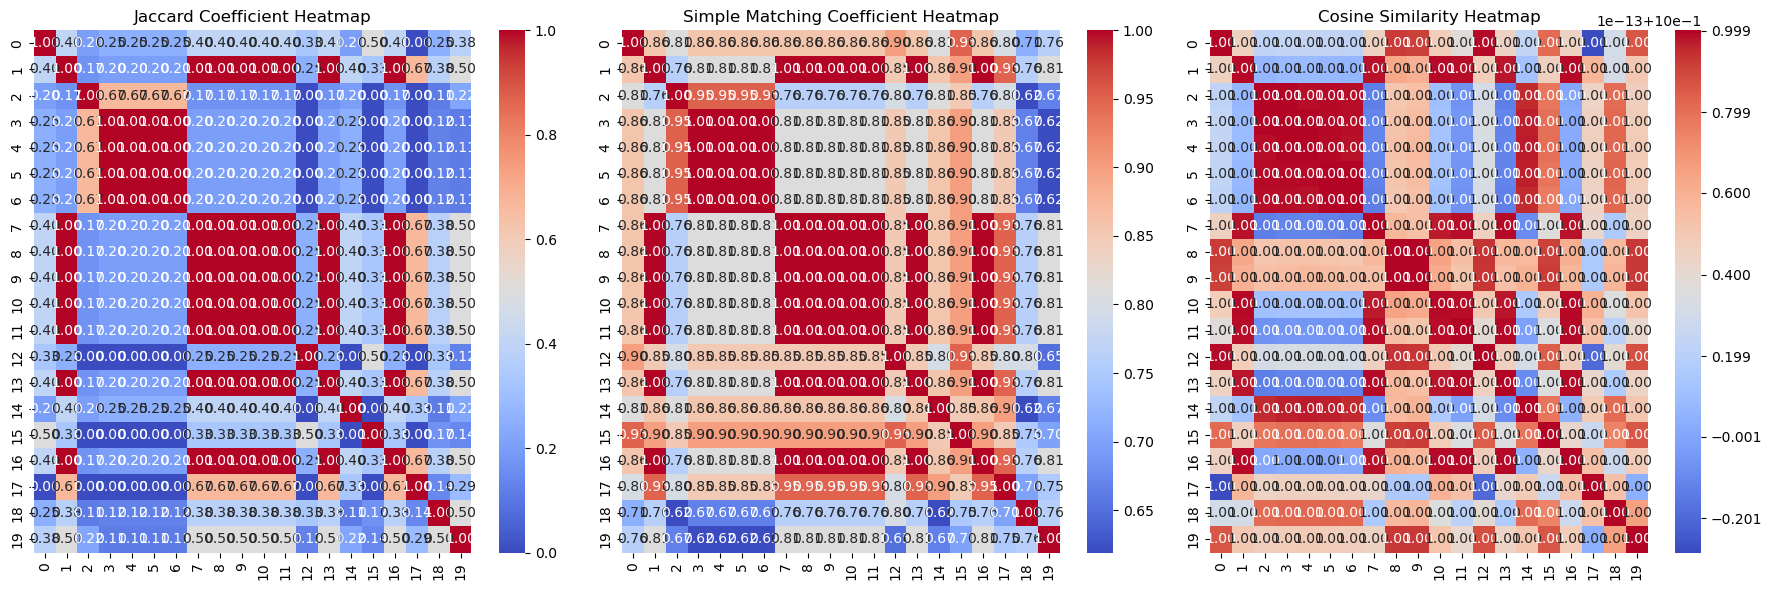

In [64]:
'''AIO. Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS
between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient
calculation as in A4 & AS. Employ a heatmap plot to visualize the similarities.
Suggestion to Python users
seaborn as sns
*ns.heatmap (data, annot True)'''

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# Load the data
file_path = 'Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'  
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Identify and encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# Extract the first 20 observation vectors (including all attributes)
subset_data = data.iloc[:20]

# Convert to numpy array for vector operations
data_array = subset_data.values

# Initialize matrices to store similarity measures
num_vectors = data_array.shape[0]
JC_matrix = np.zeros((num_vectors, num_vectors))
SMC_matrix = np.zeros((num_vectors, num_vectors))
COS_matrix = np.zeros((num_vectors, num_vectors))

# Calculate JC, SMC, and COS
for i in range(num_vectors):
    for j in range(num_vectors):
        vector1 = data_array[i]
        vector2 = data_array[j]

        # Jaccard Coefficient and Simple Matching Coefficient
        f11 = np.sum((vector1 == 1) & (vector2 == 1))
        f01 = np.sum((vector1 == 0) & (vector2 == 1))
        f10 = np.sum((vector1 == 1) & (vector2 == 0))
        f00 = np.sum((vector1 == 0) & (vector2 == 0))

        JC = f11 / (f11 + f01 + f10) if (f11 + f01 + f10) > 0 else np.nan
        SMC = (f11 + f00) / (f11 + f01 + f10 + f00) if (f11 + f01 + f10 + f00) > 0 else np.nan

        JC_matrix[i, j] = JC
        SMC_matrix[i, j] = SMC

        # Cosine Similarity
        vector1 = vector1.reshape(1, -1)
        vector2 = vector2.reshape(1, -1)
        COS = cosine_similarity(vector1, vector2)[0, 0]
        COS_matrix[i, j] = COS

# Plot heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(JC_matrix, annot=True, fmt='.2f', ax=axes[0], cmap='coolwarm', cbar=True)
axes[0].set_title('Jaccard Coefficient Heatmap')

sns.heatmap(SMC_matrix, annot=True, fmt='.2f', ax=axes[1], cmap='coolwarm', cbar=True)
axes[1].set_title('Simple Matching Coefficient Heatmap')

sns.heatmap(COS_matrix, annot=True, fmt='.2f', ax=axes[2], cmap='coolwarm', cbar=True)
axes[2].set_title('Cosine Similarity Heatmap')

plt.tight_layout()
plt.show()
